# STEP №4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nino_flats_dataset.csv')
df.head(2)

,rooms,price,price_on_m,first_pay,total_area,living_area,kitchen_area,deposit,comission,prepay,...,und_type,und_dist,floor,floor_cnt,build_year,lng,lat,link,tel,description
0,1,30000,750.00,68000.0,40.0,20.0,11.0,20000.0,60.0,1.0,...,пешком,2160.0,5,9,1976.0,44.014134,56.326148,https://nn.cian.ru/rent/flat/258002335/,tel:+79587282362,Сдается очень уютная и современная квартира ст...
1,1,18000,473.68,28800.0,38.0,20.0,9.0,0.0,60.0,1.0,...,пешком,2070.0,6,12,2005.0,43.930699,56.346951,https://nn.cian.ru/rent/flat/258046577/,tel:+79587281852,Сдаётся 1 комнатная квартира - студия. Только ...


Text(0.5, 1.0, 'График распределения квартир по этажам')


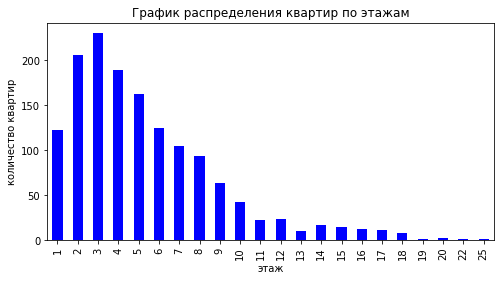

In [3]:
d = df.groupby('floor').count()['price']
b = d.plot.bar(color='blue', figsize= (8,4))
b.legend().set_visible(False)
b = plt.xlabel('этаж')
b = plt.ylabel('количество квартир')
b = plt.title('График распределения квартир по этажам')
print(b)

In [10]:
cols = df.columns
for i, data in df.head().iterrows():
    s +=f'{i+1}) '
    for col in cols:
        s += f'{col}: {data[col]}\n'
    print(s, end='\n')

1) rooms: 1
price: 30000
price_on_m: 750.0
first_pay: 68000.0
total_area: 40.0
living_area: 20.0
kitchen_area: 11.0
deposit: 20000.0
comission: 60.0
prepay: 1.0
und: Горьковская
und_time: 24.0
und_type: пешком
und_dist: 2160.0
floor: 5
floor_cnt: 9
build_year: 1976.0
lng: 44.01413400000001
lat: 56.326148
link: https://nn.cian.ru/rent/flat/258002335/
tel: tel:+79587282362
description: Сдается очень уютная и современная квартира студийной планировки с ремонтом по дизайн-проекту. Ремонт делался для себя качественными материалами. Получилась выделенная спальная зона и кухня-гостиная с лаунж-зоной напротив экрана с проектором (проектор с выходом в интернет и можно смотреть обычные каналы).
Кухонный гарнитур со встроенной бытовой техникой и посудомоечной машиной. Есть небольшая гардеробная, полноценная двуспальная кровать с ортопедическим матрацем.
Для комфортного проживания в летнюю жару установлен кондиционер.
Очень удобно что на придомовой территории установлен шлагбаум - можно парковатьс

In [14]:
def df_to_str(df):
    s = ''
    cols = df.columns
    for i, data in df.head().iterrows():
        s +=f'{i+1}) '
        for col in cols:
            s += f'{col}: {data[col]}\n'
        s += '\n'
    return s

In [15]:
print(df_to_str(df.head(2)))

1) rooms: 1
price: 30000
price_on_m: 750.0
first_pay: 68000.0
total_area: 40.0
living_area: 20.0
kitchen_area: 11.0
deposit: 20000.0
comission: 60.0
prepay: 1.0
und: Горьковская
und_time: 24.0
und_type: пешком
und_dist: 2160.0
floor: 5
floor_cnt: 9
build_year: 1976.0
lng: 44.01413400000001
lat: 56.326148
link: https://nn.cian.ru/rent/flat/258002335/
tel: tel:+79587282362
description: Сдается очень уютная и современная квартира студийной планировки с ремонтом по дизайн-проекту. Ремонт делался для себя качественными материалами. Получилась выделенная спальная зона и кухня-гостиная с лаунж-зоной напротив экрана с проектором (проектор с выходом в интернет и можно смотреть обычные каналы).
Кухонный гарнитур со встроенной бытовой техникой и посудомоечной машиной. Есть небольшая гардеробная, полноценная двуспальная кровать с ортопедическим матрацем.
Для комфортного проживания в летнюю жару установлен кондиционер.
Очень удобно что на придомовой территории установлен шлагбаум - можно парковатьс

In [18]:
def best_seller(df):
    df['comission_in_tr'] = df['comission'] * df['price'] / 1000
    result = df.groupby(['tel'], as_index = False)['comission_in_tr'].\
    sum().sort_values(by='comission_in_tr', ascending=False).head(5)
    return result

In [19]:
r = best_seller(df)
print(df_to_str(r))

AttributeError: 'DataFrame' object has no attribute 'drop_index'

Данный график показывает, что большинство сдаваемых в аренду квартир находятся на 2-4 этажах, меньше всего же на 19-25.

Text(0.5, 1.0, 'Распределения квартир по количеству комнат')


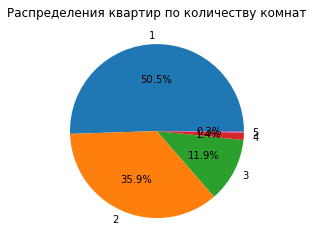

In [4]:
d = list(df.groupby('rooms').count()['price'])
roomss = list(df['rooms'])
setroomss = list(set(roomss))
b = plt.pie(d, labels=setroomss, autopct='%1.1f%%')
b = plt.title('Распределения квартир по количеству комнат')
print(b)

Данная диаграмма показывает, что больше половины сдаваемых в аренду квартир являются однокомнатными, треть - двухкомнатными, десятую часть занимают трехкомнатные, и наименьшую долю занимают четырехкомнатные и пятикомнатные квартиры (их общая доля меньше 2% от общего числа)

Text(0.5, 1.0, 'График распределения квартир по ближайшим станциям метро')


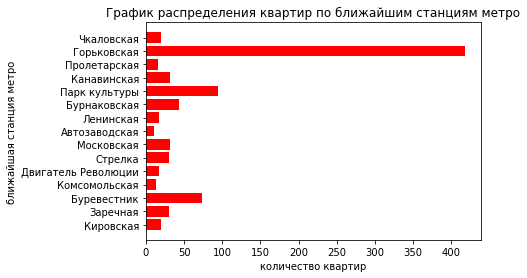

In [5]:
undergrounds = list(df['und'])
undergroundstr = pd.isnull(undergrounds)
newundergrounds = []
for i in range(len(undergrounds)):
    if undergroundstr[i] == False:
        newundergrounds.append(undergrounds[i])
setundergrounds = list(set(newundergrounds))

flat_amounts = []
for i in range(len(setundergrounds)):
    mm = 0
    for g in range(len(newundergrounds)):
        if newundergrounds[g] == setundergrounds[i]:
            mm +=1
    flat_amounts.append(mm) 
#print(setundergrounds)
#print(flat_amounts)

b = plt.barh(setundergrounds, flat_amounts, color='red')
b = plt.xlabel('количество квартир')
b = plt.ylabel('ближайшая станция метро')
b = plt.title('График распределения квартир по ближайшим станциям метро')
print(b)

Из гистограммы видно, что наибольшее количество квартир, сдаваемых в аренду, сосредоточено вокруг станции метро Горьковская. Это может быть связано с тем, что возле этой станции может находиться крупный жилой комплекс. Также не мало квартир находиться возле станций Парк культуры и Буревестник.

Text(0.5, 1.0, 'Зависимость цены от жилой площади квартиры')


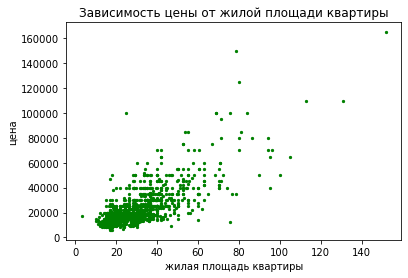

In [6]:
x = list(df['living_area'])
y = list(df['price'])
b = plt.scatter(x, y, s=5, color='green')
b = plt.xlabel('жилая площадь квартиры')
b = plt.ylabel('цена')
b = plt.title('Зависимость цены от жилой площади квартиры')
print(b)

На данном графике четко прослеживается зависимость между ценой аренды квартиры и её площадью, хотя с ростом жилой площади наблюдается определенное расширение интервалов цен. Данное явление может быть связано с тем, что при найме квартиры с большей площадью, для арендаторов наиболее влияющими на цену могут являться иные факторы.

Text(0.5, 1.0, 'Зависимость цены от площади квартиры')


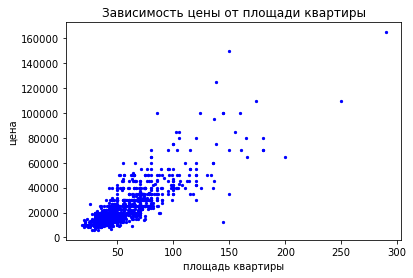

In [20]:
x = list(df['total_area'])
y = list(df['price'])
b = plt.scatter(x, y, s=5, color='blue')
b = plt.xlabel('площадь квартиры')
b = plt.ylabel('цена')
b = plt.title('Зависимость цены от площади квартиры')
print(b)

На данном графике наблюдается, идентичная предыдущему соотношению, зависимость, так как люди при выборе квартиры в первую очередь ориентируются не на сухие цифры на сайте, а на визуальные субъективные ощущения, зачастую намеренно не разделяя квартиру на жилую площадь и нежилую, а опираются на общие размеры квартиры.

Text(0.5, 1.0, 'Зависимость цены от площади квартиры')


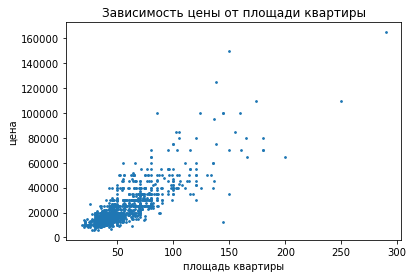

In [8]:
x = list(df['total_area'])
y = list(df['price'])
b = plt.scatter(x, y, s=3)
b = plt.xlabel('площадь квартиры')
b = plt.ylabel('цена')
b = plt.title('Зависимость цены от площади квартиры')
print(b)

Зависимости между ценой на квартиру и расстоянием до ближайшей станции метро также не наблюдается (это также подтверждается в матрице корреляции). Причины данного явления идентичны причинам отсутствия зависимости между временем до ближайшей станции метро и ценой аренды квартиры

Text(0.5, 1.0, 'Зависимость цены от времени до ближайшей станции метро')


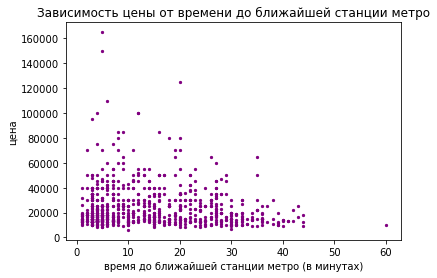

In [9]:
x = list(df['und_time'])
y = list(df['price'])
b = plt.scatter(x, y, s=5, color='purple')
b = plt.xlabel('время до ближайшей станции метро (в минутах)')
b = plt.ylabel('цена')
b = plt.title('Зависимость цены от времени до ближайшей станции метро')
print(b)

Зависимости между ценой на квартиру и временем до ближайшей станции метро не наблюдается (это подтверждается в матрице корреляции). Данное явление может в некоторой мере иметь место из-за того, что наибольшая часть исследуемых квартир находится в ценовом диапазоне до 40.000 рублей/месяц

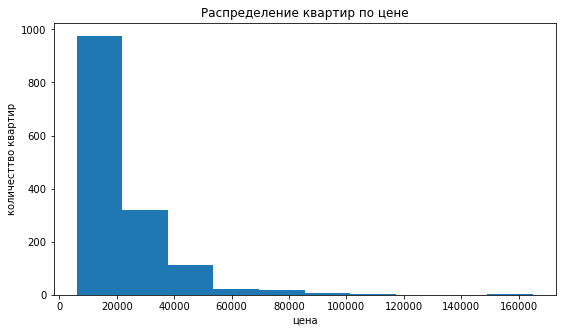

In [10]:
b = plt.figure(figsize=(9,5))
b = df['price'].plot(kind='hist')
b = plt.xlabel('цена')
b = plt.ylabel('количесттво квартир')
b = plt.title('Распределение квартир по цене')

Данный график показывает, что большая часть рынка съёмного жилья приходится на интервал цен до 20.000 рублей, а дальше снижается быстрыми темпами практически до нулевых значений. При этом, при переходе точки 145.000 рублей количество сдаваемых квартир немного возрастает, но очень несущественно.

# STEP №5

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df['price'].describe()

count      1457.000000
mean      21894.092656
std       14743.134386
min        6000.000000
25%       13000.000000
50%       17000.000000
75%       25000.000000
max      165000.000000
Name: price, dtype: float64

### Таблица корреляций

<AxesSubplot:>

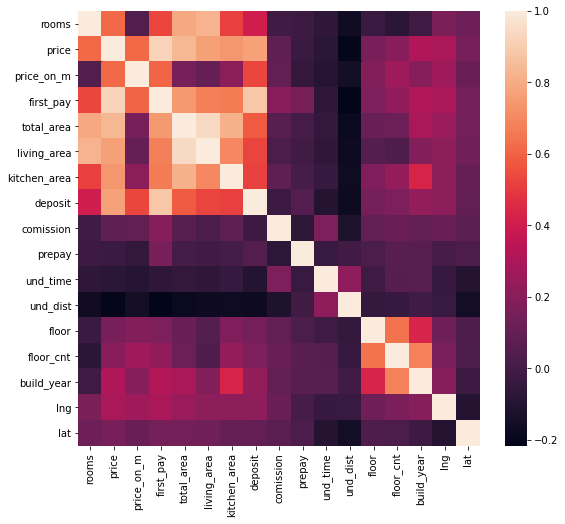

In [13]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(9,8))

sns.heatmap(corrmat)

Как видно из таблицы, цена имеет взаимозависимость с первым платежом, депозитом, площадью всей квартиры, кухни и жилых комнат. Также сильную зависимость имеют депозит и первый платеж. Судя по таблице такие признаки, как широта, долгота и расстояние и время до метра практически не имеют взаимозависимости с другими факторами.

### Средняя цена за комнату в зависимости от общего количества комнат в квартире.

In [14]:
rooms2 = list(df['rooms'])
price2 = list(df['price'])
total_area2 = list(df['total_area'])
living_area2 = list(df['living_area'])
kitchen_area2 = list(df['kitchen_area'])

liv_part = []
for i in range(len(rooms2)):
    a = round(((living_area2[i]) / (total_area2[i])), 1)
    liv_part.append(a)
#print(liv_part)
    
price_rooms = dict()
setrooms2 = list(sorted(set(rooms2)))

for i in range(len(setrooms2)):
    price_rooms[setrooms2[i]] = [0, 0]
for i in range(len(price2)):
    price_rooms[rooms2[i]][0] += price2[i] * liv_part[i]
    price_rooms[rooms2[i]][1] += 1
    
price_for_room = dict()
for i in range(len(setrooms2)):
    price_for_room[setrooms2[i]] = round(price_rooms[setrooms2[i]][0] / price_rooms[setrooms2[i]][1] / setrooms2[i])
#print(price_for_room)
rooms = list(price_for_room.keys())
price = list(price_for_room.values())
#print(rooms, price)
dff = pd.DataFrame(list(zip(rooms, price)), columns = ['rooms', 'price'])
dff

,rooms,price
0,1,7794
1,2,6731
2,3,6592
3,4,9756
4,5,9800


Полученные результаты показывают нам, что наименьшая цена за комнату у двухкомнатных и трехкомнатных квартир. Наибольшая же у четырехкомнатных и пятикомнатных квартир.

### Средняя цена аренды квартиры в зависимости от количества комнат.

In [15]:
def kvprice(df):
    df2 = df.groupby(['rooms'], as_index = False)['price'].mean()
    return(df2)
kvprice(df)

,rooms,price
0,1,15397.274457
1,2,23989.866157
2,3,35348.270115
3,4,73500.000000
4,5,100000.000000


Данная таблица отражает средние цены аренды квартиры в зависимости от количества комнат. Как и предполагалось, с ростом цен, растет и цена. Однако, так же с ростом числа комнат увеличивается и темп роста цен.

### Ищем самого богатого риелтора

In [16]:
df3 = df.groupby(['tel'], as_index = False)['comission'].sum()
df3

,tel,comission
0,tel:+79030540208,140.0
1,tel:+79040690117,235.0
2,tel:+79087333300,60.0
3,tel:+79159431817,0.0
4,tel:+79200195168,0.0
...,...,...
630,tel:+79918998832,50.0
631,tel:+79918998840,0.0
632,tel:+79918998850,0.0
633,tel:+79918998858,0.0


In [6]:
dff = df
dff['comission_in_r'] = df['comission'] * df['price']
dff.groupby(['tel'], as_index = False)['comission_in_r'].sum().sort_values(by='comission_in_r', ascending=False).head(5)

,tel,comission_in_r
37,tel:+79587280092,201360000.0
583,tel:+79918997550,123335000.0
40,tel:+79587280137,108030000.0
476,tel:+79587299247,80290000.0
44,tel:+79587280290,70000000.0


In [17]:
sorted_df3 = df3.sort_values(by='comission', ascending=False)
sorted_df3.head()

,tel,comission
37,tel:+79587280092,5350.0
583,tel:+79918997550,4265.0
40,tel:+79587280137,3140.0
226,tel:+79587290148,3125.0
44,tel:+79587280290,2450.0


Получаем, что больше всего заработает риелтор с номером телефона +79587280092	

### Функция поиска наилучших квартир

In [18]:
def best_flat(df, n=3, rooms=0, price=0, price_on_m=0, first_pay=0, total_area=0, living_area=0,
              kitchen_area=0, deposit=0, comission=0, prepay=0, und=0, und_dist=0, floor=0, build_year=0):
    """Функция принимает в качестве параметров датафрейм, n = количество итоговых результатов,
    и одноименные веса для каждого столбца. Результатом работы функции является таблица с n строками
    и колонками для ненулевых весов + link, tel, description.
    При отрицательном значении веса, значения будут соритроваться в порядке убывания,
    при положительном - в порядке возрастания.
    !ВАЖНО веса нужно нормировать. Результат работы при price=-1, living_area=1 и 
    price=-1, living_area=500 будет разный.
    (В первом варианте большую роль играет цена, во втором оптимальное соотношение)"""
    best_flats = 0
    cols = []
    if rooms != 0:
        best_flats += df.rooms * rooms
        cols.append('rooms')
    if  price != 0:
        best_flats += df.price * price
        cols.append('price')
    if price_on_m != 0:
        best_flats += df.price_on_m * price_on_m
        cols.append('price_on_m')
    if first_pay != 0:
        best_flats += df.first_pay * first_pay
        cols.append('first_pay')
    if total_area != 0:
        best_flats += df.total_area * total_area
        cols.append('total_area')
    if living_area != 0:
        best_flats += df.living_area * living_area
        cols.append('living_area')
    if kitchen_area != 0:
        best_flats += df.kitchen_area * kitchen_area
        cols.append('kitchen_area')
    if deposit != 0:
        best_flats += df.deposit * deposit
        cols.append('deposit')
    if comission != 0:
        best_flats += df.comission * comission
        cols.append('comission')
    if prepay != 0:
        best_flats += df.prepay * prepay
        cols.append('prepay')
    if und_dist != 0:
        best_flats += df.und_dist * und_dist
        cols.append('und_dist')
    if floor != 0:
        best_flats += df.floor * floor
        cols.append('floor')
    if build_year != 0:
        best_flats += df.build_year * build_year
        cols.append('build_year')
    cols.append('link')
    cols.append('tel')
    cols.append('description')
    result = df.iloc[best_flats.sort_values(ascending=False).index].reset_index().iloc[:n][cols]
    return result

In [19]:
best_flat(df, price=-1, living_area=1)

,price,living_area,link,tel,description
0,6000,18.0,https://nn.cian.ru/rent/flat/256582364/,tel:+79918997270,Сдам однокомнатную квартиру без мебели в центр...
1,6000,17.3,https://nn.cian.ru/rent/flat/244000013/,tel:+79587281240,"АГЕНТ!!! Квартира без мебели, состояние хороше..."
2,6000,17.0,https://nn.cian.ru/rent/flat/203943001/,tel:+79587294540,"6000+эл-во по счетчику и газ (60 руб.), м. Зар..."


In [20]:
best_flat(df, price=-1, living_area=500)

,price,living_area,link,tel,description
0,12000,75.5,https://nn.cian.ru/rent/flat/258113568/,tel:+79587294870,"Квартира после ремонта , не кому ранее не сдав..."
1,14200,60.0,https://nn.cian.ru/rent/flat/256670828/,tel:+79918995392,Сдам 3-комнатную квартиру в центре г.Бор на ул...
2,9000,46.6,https://nn.cian.ru/rent/flat/254709010/,tel:+79587299602,"Сдатся трхкомнатная квартира, на длительный ср..."


### Heatmaps

In [21]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [22]:
fol_map = folium.Map(location=[56.29, 43.95], zoom_start = 11) 
data = [[row['lat'],row['lng']] for index, row in df.iterrows()]
HeatMap(data).add_to(fol_map)
fol_map

### Центр города и барицентр распределения квартир

In [23]:
fol_map = folium.Map(location=[56.318, 44.023225], zoom_start = 13) 
folium.Marker([56.331932, 44.023225], popup='City Center').add_to(fol_map)
folium.Marker([df.lat.mean(), df.lng.mean()], popup='Flats Allocation Center', icon=folium.Icon(color='green')).add_to(fol_map)
fol_map

Синий - центр города, зеленый - барицентр распределения квартир